In [2]:
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import cvxpy as cvx


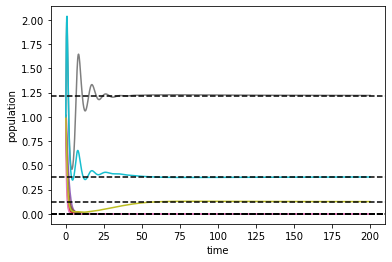

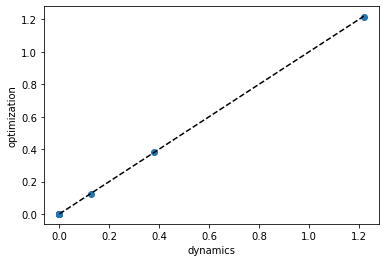

In [37]:
x_num=10
n_num=10
r_num=10
meanD=1
meanC=1
sdD=1
sdC=1

#np.random.seed(10)

statevec=np.concatenate((np.ones((x_num+n_num)),np.ones((r_num))))

D=meanD/n_num+sdD*np.random.normal(0, 1, (x_num,n_num))/np.sqrt(n_num)
C=meanC/r_num+sdC*np.random.normal(0, 1, (n_num,r_num))/np.sqrt(r_num)

mu=np.ones((x_num))
m=np.ones((n_num))
K=np.ones((r_num))

def d_statevec_dt(t,statevec):
    
    
        Xs=statevec[:x_num]
        Ns=statevec[x_num:x_num+n_num]
        Rs=statevec[x_num+n_num:]
        
        dXs=Xs*(np.dot(D,Ns)-mu)
        dNs=Ns*(np.dot(C,Rs)-m-np.dot(D.T,Xs))
        dRs=Rs*(K-Rs-np.dot(C.T,Ns))
        return np.concatenate((dXs,dNs,dRs),axis=None)

maxtime=200

steps=1000
ts = np.linspace(0,maxtime,steps)    
sol = solve_ivp(d_statevec_dt, t_span=[0,maxtime],y0=statevec,t_eval=ts,method='LSODA')
ys=sol.y.T
#plt.plot(np.sort(ys.T[x_num:x_num+n_num].T[-1]),'o')

plt.plot(ts,ys.T[x_num:x_num+n_num].T)
plt.xlabel('time')
plt.ylabel('population')
#plt.ylim(0,20)
Ns = cvx.Variable(n_num)
constraints=[D @ Ns <= mu, Ns>=0]
Q=np.dot(C,K)

prob = cvx.Problem(cvx.Minimize(-(Q.T-m)@Ns+(1/2)*cvx.quad_form(Ns, np.dot(C,C.T)) ),constraints)
prob.solve()
for value in Ns.value:
       plt.axhline(value,color='k',ls='--')
        
plt.figure()
#plt.plot(np.sort(Ns.value),'o')
#constraints[0].dual_value

#plt.ylim(0,2)
plt.xlabel("dynamics")
plt.ylabel("optimization")
plt.plot(np.sort(ys.T[x_num:x_num+n_num].T[-1]),np.sort(Ns.value),'o')
plt.plot(np.linspace(0, ys.T[x_num:x_num+n_num].T[-1].max()),np.linspace(0, ys.T[x_num:x_num+n_num].T[-1].max()), 'k--')
plt.show()
#print(ys.T[x_num:x_num+n_num].T)

In [22]:
print(np.sort(ys.T[x_num:x_num+n_num].T[-1]))
print(np.sort(Ns.value))

[-2.32588530e-16 -3.19105462e-19 -4.42922756e-23 -4.40283108e-23
 -1.41197257e-24 -9.64959333e-26 -7.93566301e-26 -2.50468511e-26
  2.53080344e-01  1.19040828e+00]
[-1.76069746e-22 -7.23689803e-23  3.39385463e-25  1.17965016e-24
  1.26577649e-23  6.11390117e-23  7.52517271e-23  2.32479055e-22
  2.53080346e-01  1.19040829e+00]


<ipython-input-39-181d5f2d2dc1>:28: RuntimeWarning: overflow encountered in multiply
  dRs=Rs*(K-Rs-np.dot(C.T,Xs))
/Users/Zhijie/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_ode.py:1350: UserWarning: lsoda: Repeated convergence failures (perhaps bad Jacobian or tolerances).
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


ValueError: x and y must have same first dimension, but have shapes (1000,) and (100, 110)

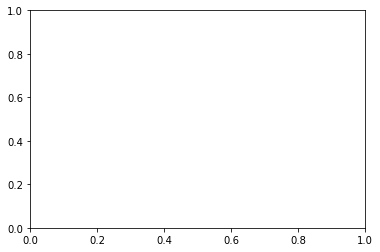

In [39]:
x_num=100
r_num=10


meanC=1

sdC=1

#np.random.seed(20)

statevec=2*np.ones((x_num+r_num))


C=meanC/r_num+sdC*np.random.normal(0, 1, (x_num,r_num))/np.sqrt(r_num)

m=np.ones((x_num))
K=np.ones((r_num))

def d_statevec_dt(t,statevec):
    
    
        Xs=statevec[:x_num]
  
        Rs=statevec[x_num:]
        
        dXs=Xs*(np.dot(C,Rs)-m)
        
        dRs=Rs*(K-Rs-np.dot(C.T,Xs))
        
        
        return np.concatenate((dXs,dRs),axis=None)

maxtime=100

steps=1000
ts = np.linspace(0,maxtime,steps)    
sol = solve_ivp(d_statevec_dt, t_span=[0,maxtime],y0=statevec,t_eval=ts,method='LSODA')
ys=sol.y

#plt.plot(np.sort(ys.T[x_num:x_num+n_num].T[-1]),'o')


plt.plot(ts,ys[:, :x_num].T)
plt.xlabel('time')
plt.ylabel('population')

Rs = cvx.Variable(r_num)
constraints=[C@Rs <= m,Rs>=0]


prob = cvx.Problem(cvx.Minimize(cvx.quad_form(Rs-K,np.ones((r_num,r_num)))),
                         constraints)
prob.solve()
plt.figure()
#plt.plot(np.sort(Ns.value),'o')
#constraints[0].dual_value
#for value in Ns.value:
 #      plt.axhline(value)
#plt.ylim(0,2)
plt.xlabel("dynamics")
plt.ylabel("optimization")
plt.plot(np.sort(ys.T[x_num:].T[-1]),np.sort(Rs.value),'o')
plt.show()
#print(ys.T[x_num:x_num+n_num].T)


<AxesSubplot:ylabel='Count'>

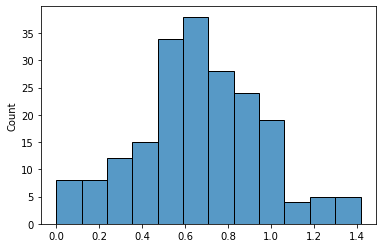

In [300]:
sns.histplot(ys.T[x_num:].T[-1])

In [312]:
ys.T[:x_num].T[-1]

/Users/Zhijie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 8.12827953e-18,  2.74585554e-08, -3.96440825e-26,  3.17541741e-24,
        6.10695841e-25,  3.72328015e-13,  3.31184359e-07,  5.98310605e-31,
        6.78189113e-26, -1.65736808e-20,  2.05447830e-14,  4.87938523e-30,
        6.26581138e-02,  2.35249321e-25,  1.93876994e-33,  6.70012293e-35,
       -2.22214611e-29, -1.81205312e-30,  1.06019301e-17,  2.27206242e-15,
       -2.47990633e-29,  3.81043650e-29,  1.17223007e-28,  6.05012108e-02,
        5.56582257e-27, -2.29131203e-28, -2.28069154e-30,  1.16384362e-24,
        9.40282023e-28,  8.80599049e-01,  3.82859275e-28, -5.35943635e-30,
        2.10962712e-22, -4.91269764e-26,  5.80566757e-17,  1.56278753e-28,
       -2.39102203e-34,  5.01345144e-01,  6.80435539e-28,  3.31527295e-24,
        3.02941019e-25,  2.33308814e-18,  4.53473060e-05,  2.21292877e-12,
        1.42031637e-26,  6.46181257e-11, -4.31435629e-29,  6.63377312e-33,
        1.14043450e-28, -2.17222955e-28,  1.40650956e-16,  2.64397437e-15,
       -7.07529479e-31,  

In [284]:
#ys.T[x_num:].T[-1]
Rs.value

array([ 130.5869604 , -101.03877255,  -16.25026919,  -47.61899862,
        -81.38239257,  -23.02237567,  -49.76754554, -149.99666396,
        117.38582518,  -19.18707154,   62.88297574,   60.92455468,
        -12.76025399,   57.02958514,   36.19554075, -275.21054448,
         28.84423983,  -17.30922864, -131.71778544,  -42.03762366,
         57.30262751,   12.92995758,  -56.78073689,   35.48681648,
       -129.905445  ,  -76.89015815,   73.7428872 ,   24.85611351,
        -47.87323169,  -47.55636934, -142.57315038,   88.46915994,
        -29.41890572,  -57.98317918,  -27.45454442,   84.13103378,
         52.88381737, -161.80394007,    8.45083293, -125.02502828,
        -35.54864608,   69.41505758,  105.39327093,  -55.7367439 ,
         35.07006104,  206.49284414,  -32.00942744,   63.60061267,
        -70.15678213,   12.12469706,  -37.23372808,   65.93319483,
         35.74450274,    7.27910522,   34.2460706 ,  -64.94695437,
         92.0416656 ,  208.81420513,   69.24165835, -130.27346

In [155]:
Ns.value

/Users/Zhijie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ 1.43720859e+01, -2.97960649e-21,  6.80524966e-22,  4.99780891e+00,
       -2.06041639e-21,  3.55322125e-01,  1.08651207e+00,  3.11386200e+00,
        4.70103089e+00,  3.80566774e+00,  4.70555138e-22,  7.77010631e-01,
        4.59513657e+00,  7.26194385e+00, -2.65804290e-21, -8.10749865e-22,
        1.23401958e-21, -6.73823154e-22, -1.99292646e-21, -1.53082997e-21])

In [63]:
np.dot(C,K)

array([ 3.44698741,  2.5253232 ,  4.83308529, -1.81455285, -0.19262428,
       -6.0142749 , -3.80474516, 11.43276319,  5.26768298,  0.75118155,
        1.73752065, -2.40415924, -3.75642319,  0.79078181,  1.52728926])

In [73]:
Q.T@Ns

Expression(AFFINE, UNKNOWN, ())

In [93]:
len(ys)

/Users/Zhijie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100

In [ ]:
Rs-K)@(Rs-K)